# Unsupervised Learning with PCA and K Means

### Setup

In [143]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [144]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [145]:
# import os

# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/Final Project/'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [146]:
# Random seed for reproducibility
random.seed(4)

## Principal Component Analysis

### Data Preprocessing

In [147]:
# Fetching the data
real_df = pd.read_json('realAccountData.json')
fake_df = pd.read_json('fakeAccountData.json')

# Concatenate the two datasets
df = pd.concat([real_df, fake_df], ignore_index=True)

# Remove categorical variables for PCA
df_pca = df.drop(["userHasProfilPic", "userIsPrivate"], axis=1)

# Display the first 10 rows
df_pca.head(10)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,0,10,0
1,263,482,30,29,0,8,0
2,51,78,9,0,0,10,0
3,297,480,22,25,2,9,0
4,113,242,0,95,0,10,0
5,545,995,26,340,0,8,0
6,52,121,0,30,0,9,0
7,1038,6640,0,156,0,12,0
8,172,227,51,10,0,10,0
9,101,114,14,4,0,15,0


In [148]:
# Turning real/fake data into numpy arrays
numpy_real = np.array(real_df)
numpy_fake = np.array(fake_df)
numpy_all = np.array(df_pca)


In [149]:
X = df_pca.drop('isFake', axis=1)
Y = df_pca['isFake'].astype('category')

# Standardizing continuous variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Define the PCA Model

In [150]:
# Define PCA model
pca = PCA(n_components=5)
# Fit PCA on training data
pca.fit(X_scaled)
# Transform both training and testing data
x_pca = pca.transform(X_scaled)

### Explained Variace

In [151]:
# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Put into a dataframe for plotting
explained_var_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    'Explained Variance Ratio': explained_variance
})

### Visualize

Text(0, 0.5, 'PC2')

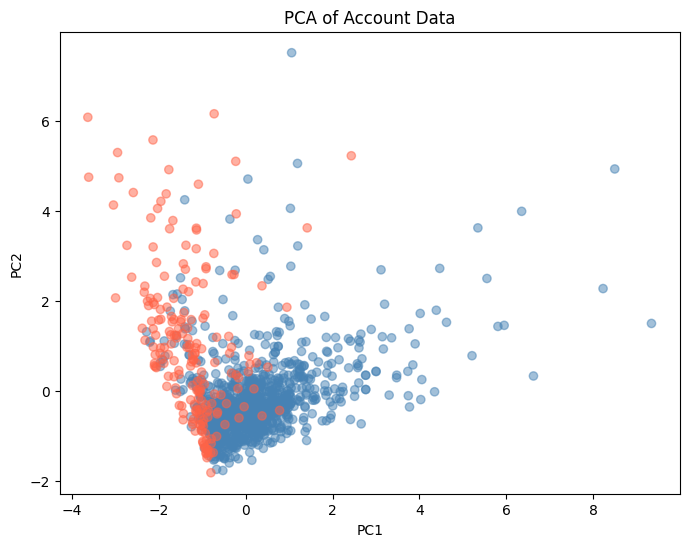

In [152]:
# Scatterplot of PCA results
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5, c=['tomato' if label else 'steelblue' for label in Y])
plt.title('PCA of Account Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Explained Variance Ratio')

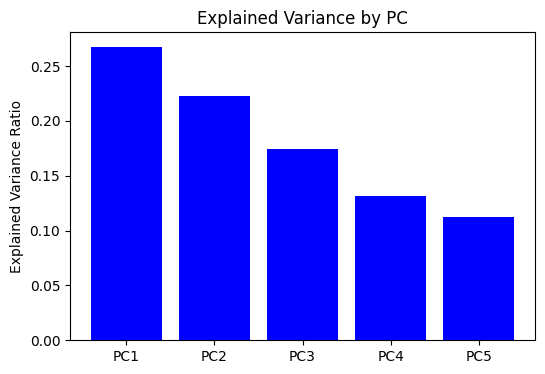

In [153]:
# Bar Plot of Explained Variance Ratios
plt.figure(figsize=(6,4))
plt.bar(explained_var_df['Principal Component'], explained_var_df['Explained Variance Ratio'], color='blue')
plt.title('Explained Variance by PC')
plt.ylabel('Explained Variance Ratio')

## K-Means Clustering

### Define the Model

In [154]:
# K-Means Clustering (K=2)
kmeans = KMeans(n_clusters=2, random_state=8)
kmeans.fit(x_pca)

KMeans(n_clusters=2, random_state=8)

### Visualize Clusters

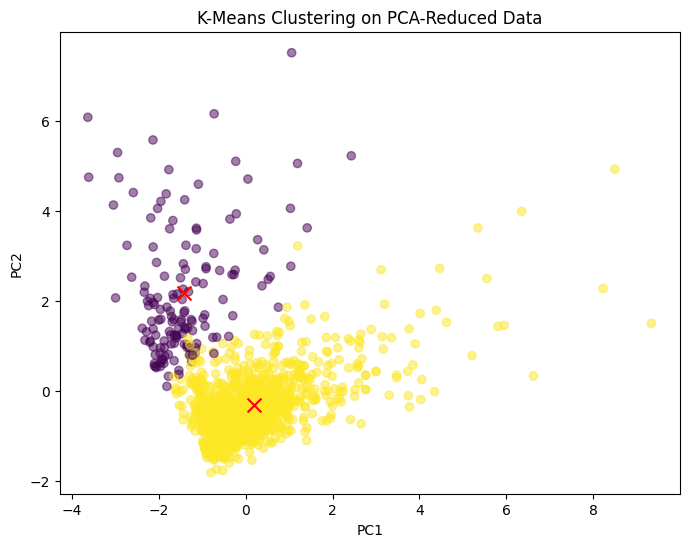

In [155]:
# Scatterplot of K-Means Clustering results
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x')  # Plot cluster centers
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()